In [ ]:
                                               # EDA ON TELECOM CUSTOMER CHURN ANALYSIS 
                                                                               # :-SHASHWAT ANAND

In [ ]:
                                                   #  IMPORTING NECESSARY LIBRARIES 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
                                                          # DATASETS 

In [10]:
df=pd.read_csv('customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
                                                      # DATA INSPECTION

In [ ]:
 # INFORMATION ABOUT DATASETS

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# replacing blanks with 0 as tenure is 0 and no total charges are recoreded.

In [15]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
 # CHECKING NULL VALUES

In [17]:
df.isnull().sum().sum()

0

In [ ]:
# DESCRIPTIVE STATISTICS

In [19]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [50]:
df["customerID"].duplicated().sum()

0

In [ ]:
 # CHANGING THE VALUES OF COLUMN "SENIOR CITIZEN" IN YES/NO

In [21]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

In [ ]:
                                                # UNIVARIATE ANALYSIS AND DATA VISUALISATION

In [ ]:
# NUMBERS OF CUSTOMER CHURNED

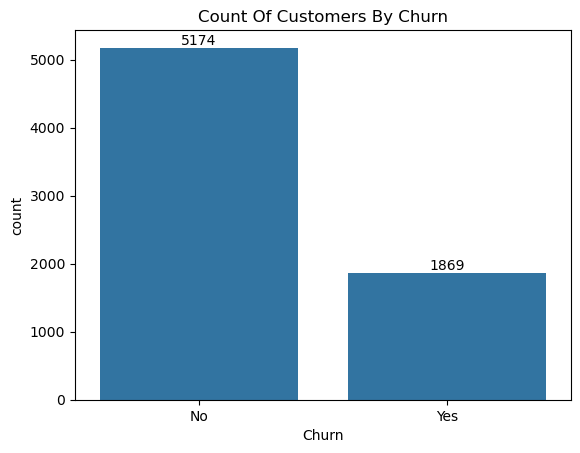

In [24]:
ax=sns.countplot(x='Churn',data=df)

ax.bar_label(ax.containers[0])
plt.title("Count Of Customers By Churn")
plt.show()

In [ ]:
# PERCENTAGE OF CHURNED CUSTOMERS

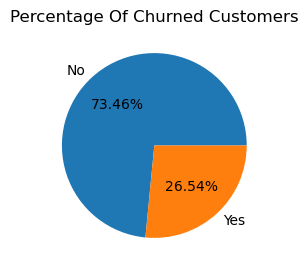

In [88]:
plt.figure(figsize=(3,3))
gb=df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels=gb.index,autopct= "%1.2f%%")
plt.title("Percentage Of Churned Customers")
plt.show()

In [ ]:
# Conclusion:-from the given pie chart, we conclude that 26.54% of our customers have churned out.
# now Let's explore the reason behind it.

In [ ]:
# CHURN BY GENDER

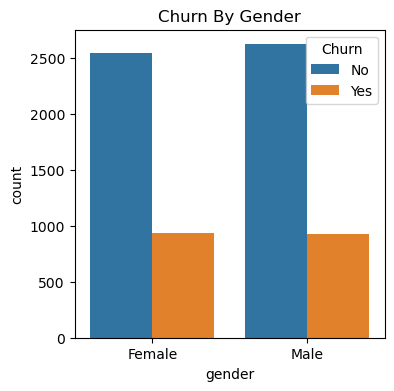

In [107]:
plt.figure(figsize=(4,4))
sns.countplot(x="gender",data=df,hue="Churn")
plt.title("Churn By Gender")
plt.show()

In [ ]:
 # CHURNED BY SENIOR CITIZEN

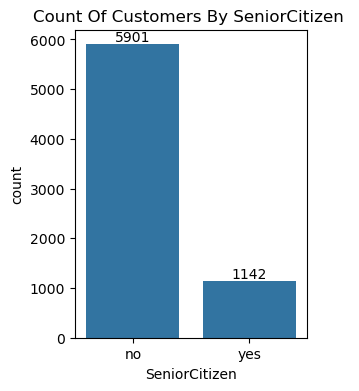

In [172]:
plt.figure(figsize=(3,4))
ax=sns.countplot(x="SeniorCitizen",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count Of Customers By SeniorCitizen ")
plt.show()

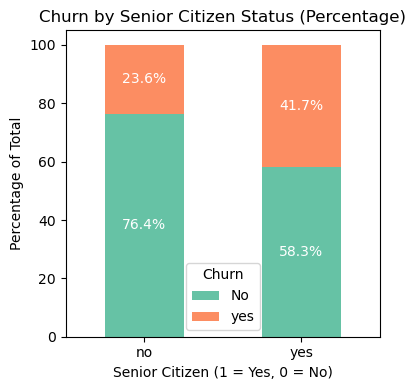

In [123]:
count_data = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='Counts')

# Calculate total counts per SeniorCitizen status
total_counts = count_data.groupby('SeniorCitizen')['Counts'].transform('sum')

# Calculate percentage
count_data['Percentage'] = count_data['Counts'] / total_counts * 100

# Pivot for stacked bar chart
pivot_data = count_data.pivot(index='SeniorCitizen', columns='Churn', values='Percentage').fillna(0)

# Plot
pivot_data.plot(kind='bar', stacked=True, color=['#66c2a5', '#fc8d62'], figsize=(4, 4))

# Adding labels and title
plt.title('Churn by Senior Citizen Status (Percentage)')
plt.xlabel('Senior Citizen (1 = Yes, 0 = No)')
plt.ylabel('Percentage of Total')
plt.xticks(rotation=0)

# Adding percentage labels on bars
for i in range(len(pivot_data)):
    total = pivot_data.iloc[i].sum()
    for j in range(len(pivot_data.columns)):
        plt.text(i, pivot_data.iloc[i, j] / 2 + (pivot_data.iloc[i, :j].sum() if j > 0 else 0),
                 f"{pivot_data.iloc[i, j]:.1f}%", ha='center', va='center', color='white')

plt.legend(title='Churn', labels=['No', 'yes'])
plt.tight_layout()
plt.show()

In [ ]:
# senior citizens have a significantly higher churn rate (41.7%) compared to non-senior citizens (23.6%).

In [ ]:
 # CUSTOMER TENURE ON CHURN 

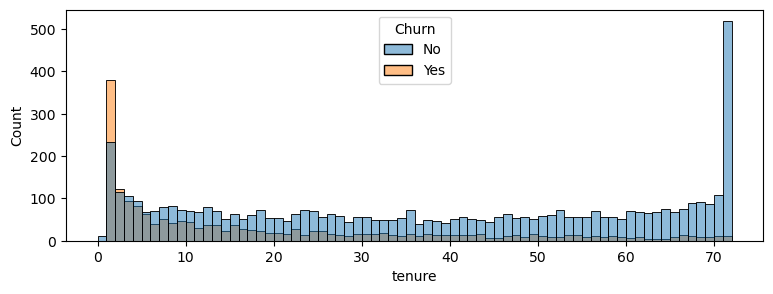

In [133]:
plt.figure(figsize=(9,3))
sns.histplot(x="tenure",data=df,bins=72,hue="Churn")
plt.show()

In [ ]:
# people who have used the services for a long time have stayed and people who have used the services for 1 or 2 months have churned.

In [ ]:
 # CUSTOMER CONTRACT ON CHURN RATE

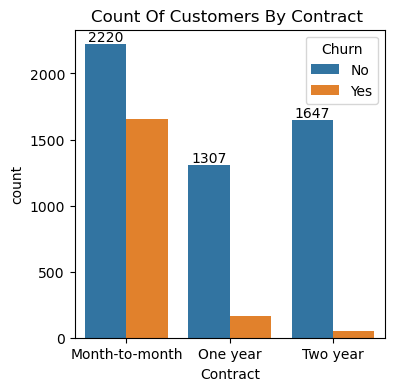

In [140]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count Of Customers By Contract ")
plt.show()

In [ ]:
# people who have month to month contract are likely to churn more then people who have contracted for 1 or 2 years.

In [ ]:
# CHURN COUNT WITH SOME SERVICES

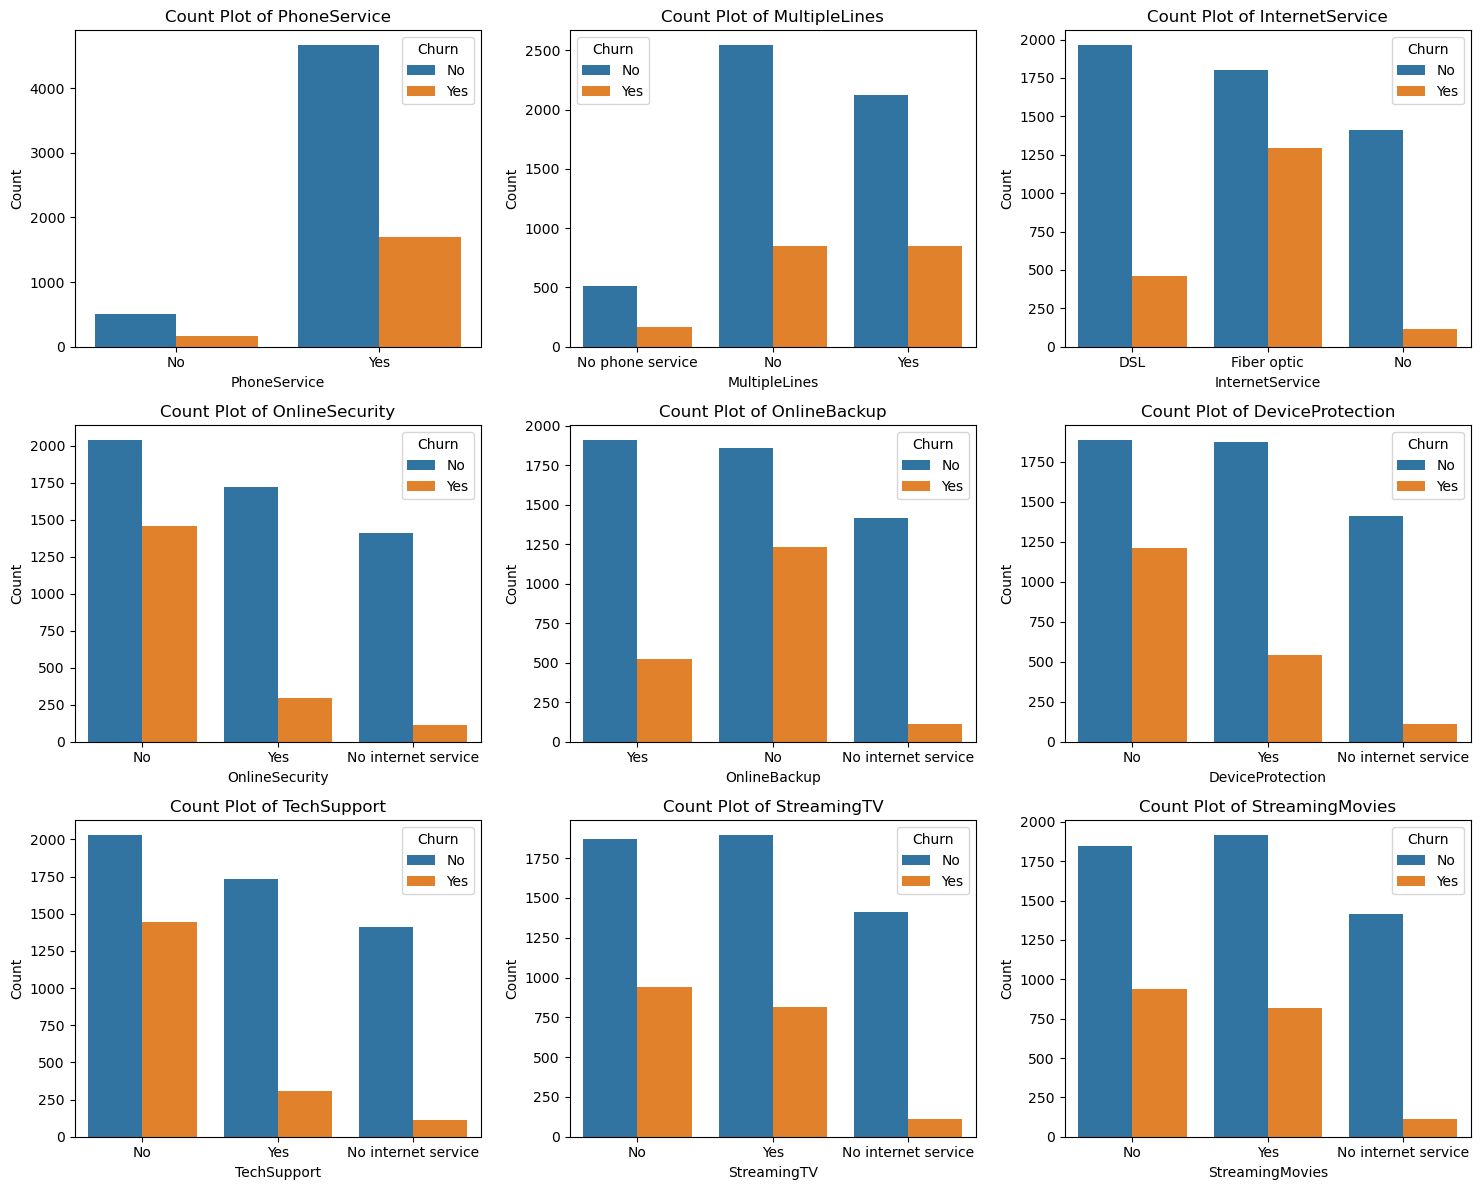

In [146]:
# Columns to create count plots for
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
           'StreamingMovies']

# Set up the subplot grid
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes

# Create count plots for each column
for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, ax=axes[i],hue="Churn")
    axes[i].set_title(f'Count Plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
# PhoneService: Customers with phone service tend to churn more compared to those without it.
# MultipleLines: Customers without multiple lines or those with no phone service have slightly lower churn rates compared to those with multiple lines.
# InternetService: Fiber optic users have a higher churn rate compared to DSL or those without internet service.
# OnlineSecurity: Customers without online security have a much higher churn rate compared to those with the service.
# OnlineBackup: Similar to online security, customers without backup services churn more often than those with backup services.
# DeviceProtection: Churn is higher among customers without device protection compared to those who have it.
# TechSupport: Customers without tech support experience significantly higher churn compared to those with the service.
# StreamingTV: Streaming TV subscribers have a slightly higher churn rate compared to non-subscribers.
# StreamingMovies: Churn rates for streaming movies follow a similar pattern, with slightly higher churn for subscribers compared to non-subscribers.

In [ ]:
 # CHURNED CUSTOMERS BY PAYMENT METHOD

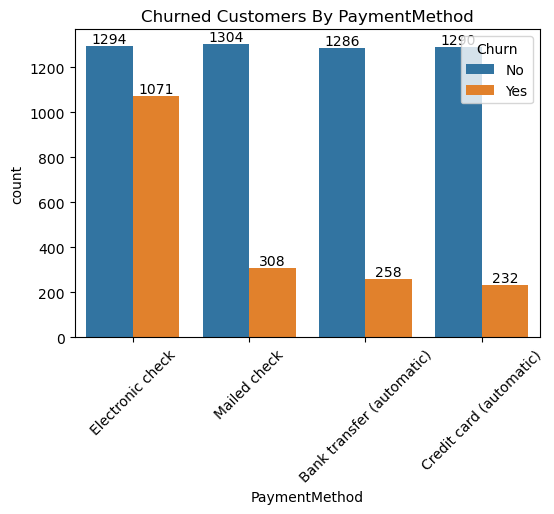

In [162]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers By PaymentMethod")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Customers using electronic checks have the highest churn rate, while those using automatic payments (bank transfer or credit card) experience significantly lower churn.